## EJERCICIO N°1: Visualizar imágenes originales y su conversión a escala de grises ##

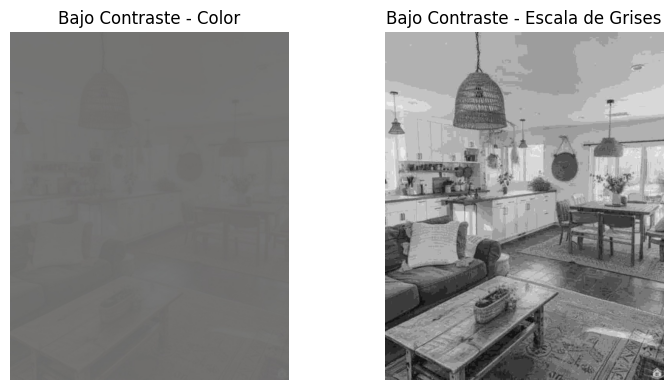

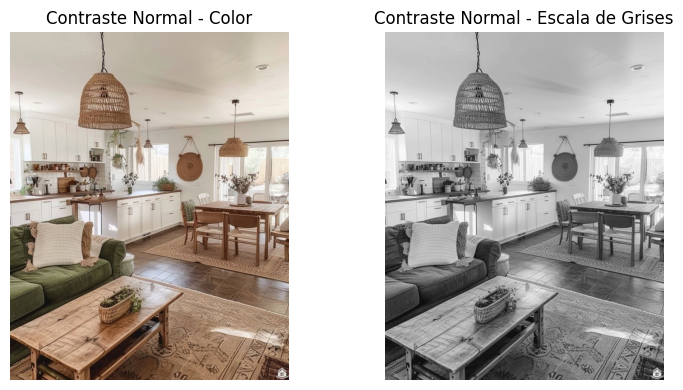

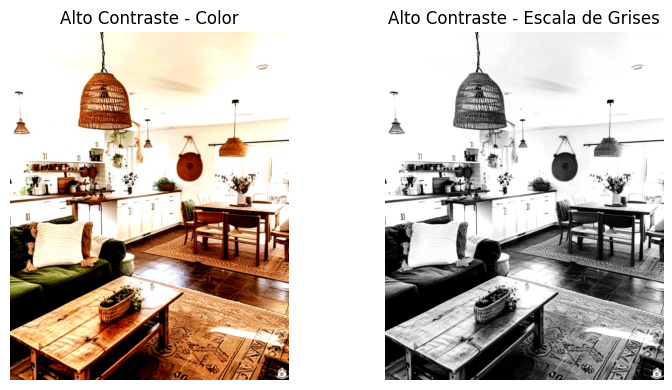

In [40]:
import cv2
import matplotlib.pyplot as plt

# Función para mostrar la imagen original y su versión en escala de grises
def mostrar_color_y_gris(nombre_archivo, titulo):
    
    # Leer imagen en color (OpenCV usa BGR)
    imagen_color = cv2.imread(nombre_archivo + '.jpg')
    imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

    # Convertir a escala de grises
    imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

    # Mostrar imágenes lado a lado
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(imagen_rgb)
    plt.title(f'{titulo} - Color')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(imagen_gris, cmap='gray')
    plt.title(f'{titulo} - Escala de Grises')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Mostrar las tres imágenes con su conversión
mostrar_color_y_gris('salaunobajocontraste', 'Bajo Contraste')
mostrar_color_y_gris('salauno', 'Contraste Normal')
mostrar_color_y_gris('salaunoaltocontraste', 'Alto Contraste')


## Ejericio N°2: Mostrar imagen en gris + histogramas:

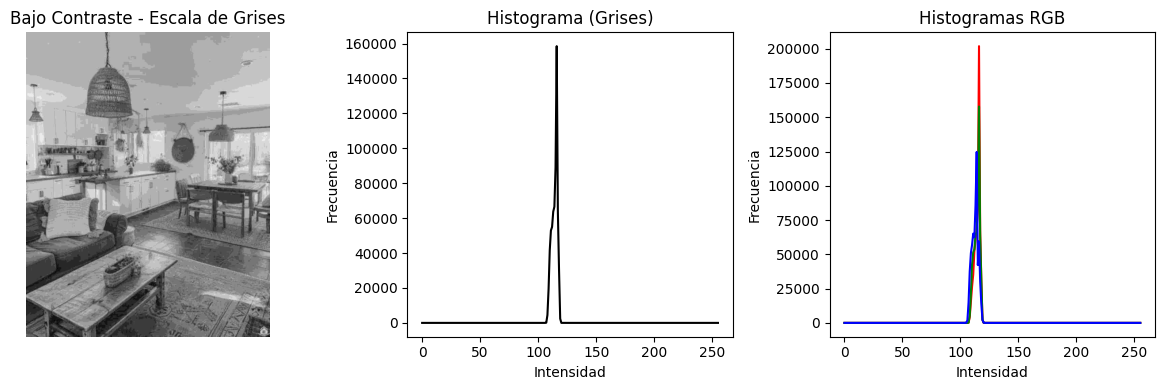

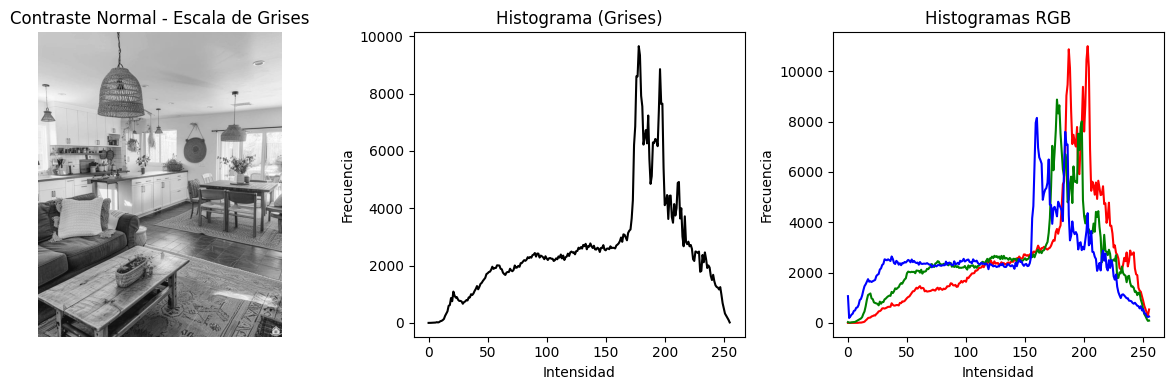

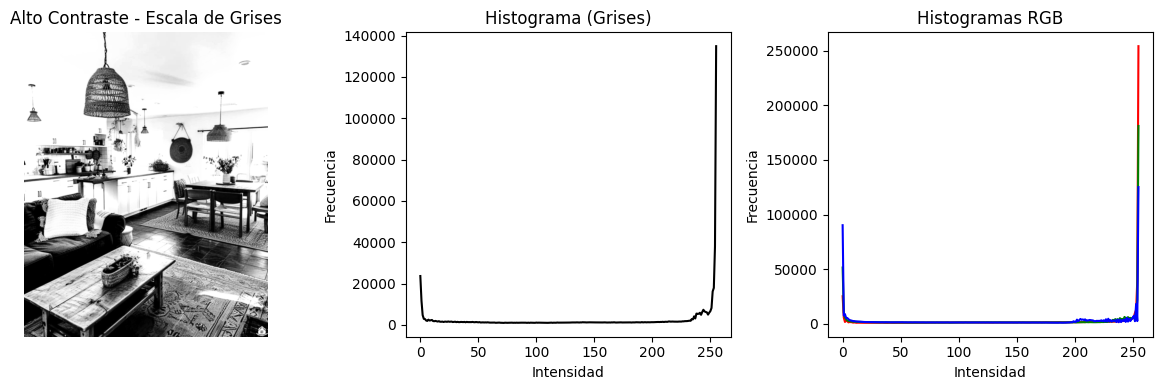

In [41]:
import cv2
import matplotlib.pyplot as plt

def mostrar_histogramas(nombre_archivo, titulo):
    # Leer la imagen en color
    imagen_color = cv2.imread(nombre_archivo + '.jpg')
    imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)
    imagen_gris = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2GRAY)

    # Calcular histograma en escala de grises
    hist_gris = cv2.calcHist([imagen_gris], [0], None, [256], [0, 256])

    # Crear figura
    plt.figure(figsize=(12, 4))

    # Imagen en escala de grises
    plt.subplot(1, 3, 1)
    plt.imshow(imagen_gris, cmap='gray')
    plt.title(f'{titulo} - Escala de Grises')
    plt.axis('off')

    # Histograma en escala de grises
    plt.subplot(1, 3, 2)
    plt.plot(hist_gris, color='black')
    plt.title('Histograma (Grises)')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')

    # Histogramas de los canales RGB
    plt.subplot(1, 3, 3)
    colores = ('r', 'g', 'b')
    for i, color in enumerate(colores):
        hist_color = cv2.calcHist([imagen_rgb], [i], None, [256], [0, 256])
        plt.plot(hist_color, color=color)
    plt.title('Histogramas RGB')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

# Ejecutamos para las tres imágenes
mostrar_histogramas('salaunobajocontraste', 'Bajo Contraste')
mostrar_histogramas('salauno', 'Contraste Normal')
mostrar_histogramas('salaunoaltocontraste', 'Alto Contraste')


## Ejercicio N°3:  Aplicación de la ecualización de histogramas

Ecualización de imágenes en escala de grises

In [42]:
def ecualizar_gris(nombre_archivo, titulo):
    # Leer imagen original en color
    img_color = cv2.imread(nombre_archivo + '.jpg')
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)

    # Ecualización
    img_eq = cv2.equalizeHist(img_gray)

    # Histograma
    hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])

    # Visualización
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(img_eq, cmap='gray')
    plt.title(f'{titulo} - Ecualizada (Grises)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.plot(hist_eq, color='blue')
    plt.title('Histograma Ecualizado (Grises)')
    plt.xlabel('Intensidad')
    plt.ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()


Ecualización de imágenes a color (usando el canal Y de YUV)

In [43]:
def ecualizar_color_yuv(nombre_archivo, titulo):
    # Leer imagen original en color
    img_color = cv2.imread(nombre_archivo + '.jpg')

    # Convertir a YUV
    img_yuv = cv2.cvtColor(img_color, cv2.COLOR_BGR2YUV)

    # Ecualizar solo el canal Y (luminancia)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])

    # Volver a BGR (para visualización con matplotlib)
    img_eq_color = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    img_rgb = cv2.cvtColor(img_eq_color, cv2.COLOR_BGR2RGB)

    # Visualización
    plt.figure(figsize=(6, 4))
    plt.imshow(img_rgb)
    plt.title(f'{titulo} - Ecualizada (Color)')
    plt.axis('off')
    plt.show()


Aplicación a las imágenes

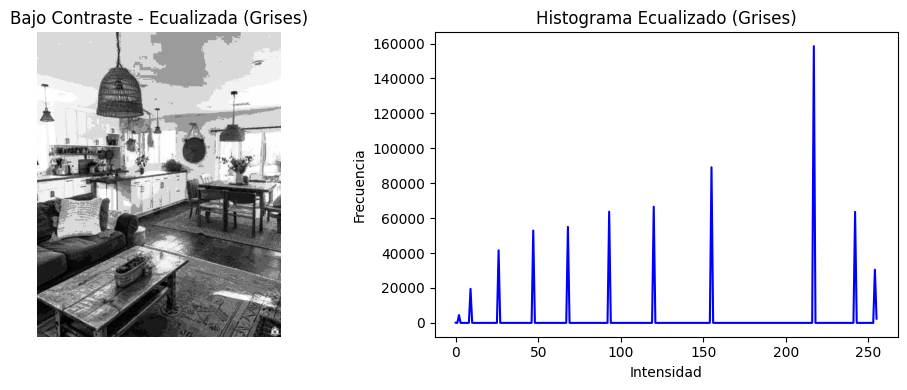

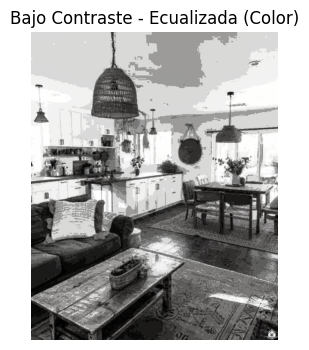

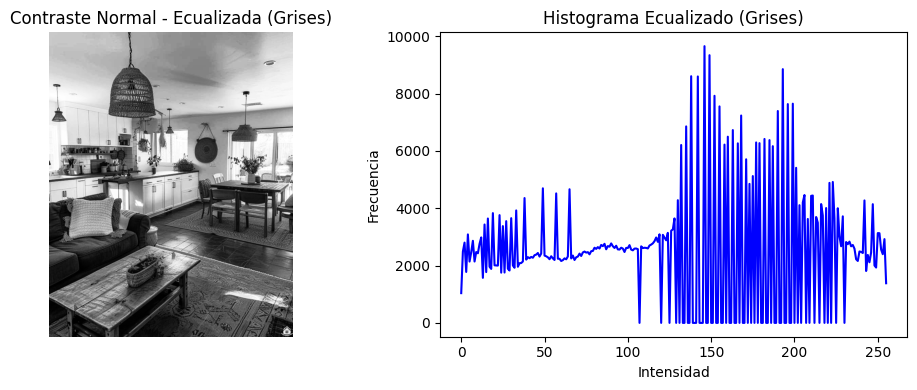

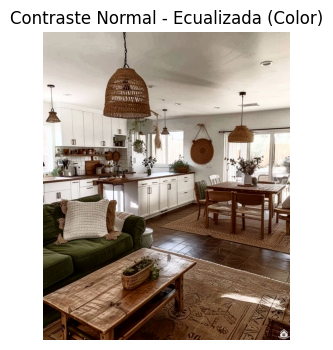

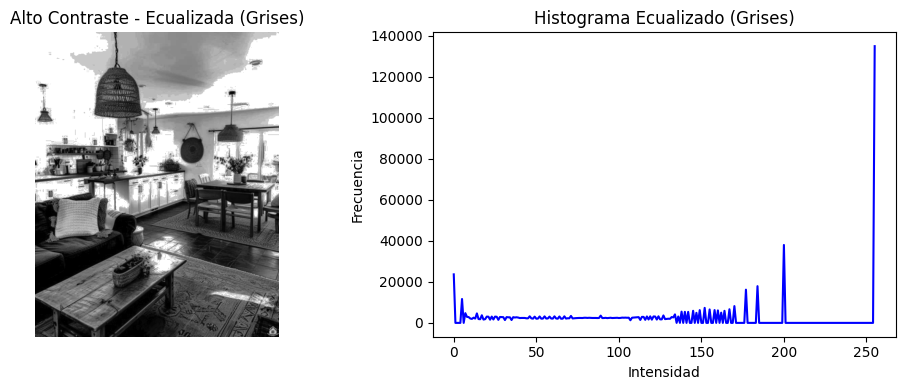

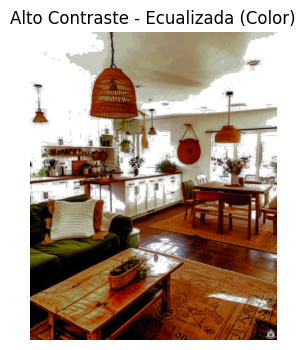

In [44]:
ecualizar_gris('salaunobajocontraste', 'Bajo Contraste')
ecualizar_color_yuv('salaunobajocontraste', 'Bajo Contraste')

ecualizar_gris('salauno', 'Contraste Normal')
ecualizar_color_yuv('salauno', 'Contraste Normal')

ecualizar_gris('salaunoaltocontraste', 'Alto Contraste')
ecualizar_color_yuv('salaunoaltocontraste', 'Alto Contraste')


## Ejercicio N°4: Ecualización adaptativa del histograma (CLAHE) ##

En primer lugar, lo haremos con la imagen de bajo contraste:

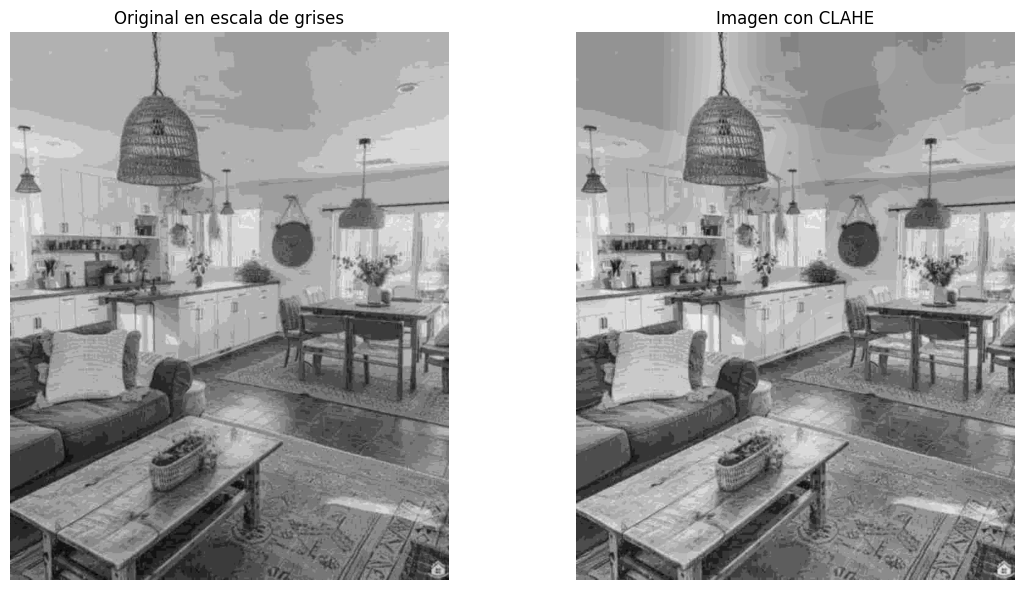

In [45]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises 
img_gray = cv2.imread("salaunobajocontraste.jpg", cv2.IMREAD_GRAYSCALE)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE
img_clahe = clahe.apply(img_gray)

# Mostrar ambas imágenes
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original en escala de grises")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Imagen con CLAHE")
plt.imshow(img_clahe, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Para la imagen con constraste normal sería: 

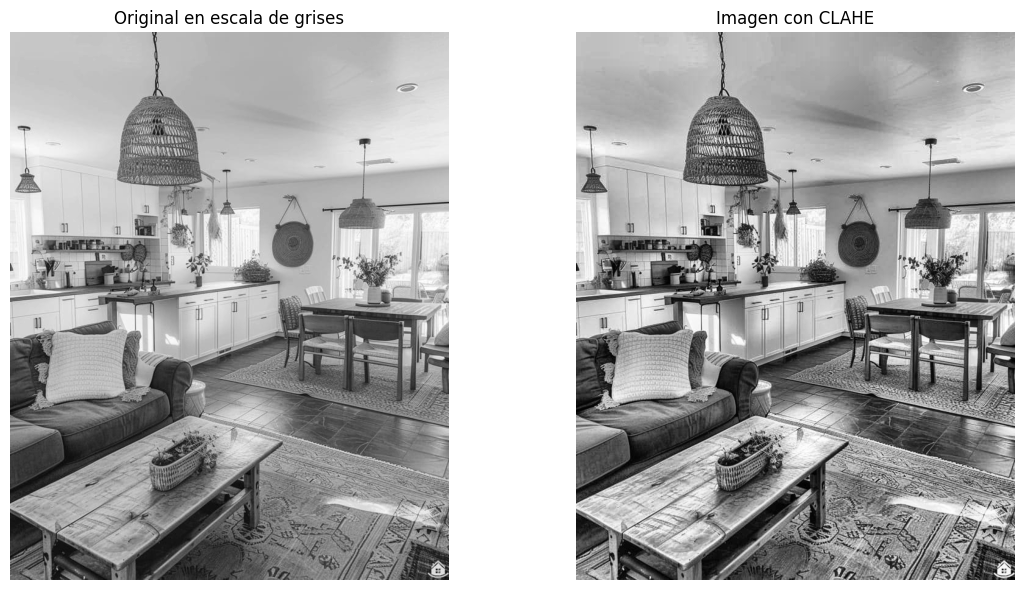

In [46]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises 
img_gray = cv2.imread("salauno.jpg", cv2.IMREAD_GRAYSCALE)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE
img_clahe = clahe.apply(img_gray)

# Mostrar ambas imágenes
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original en escala de grises")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Imagen con CLAHE")
plt.imshow(img_clahe, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Para la imagen con contraste alto sería: 

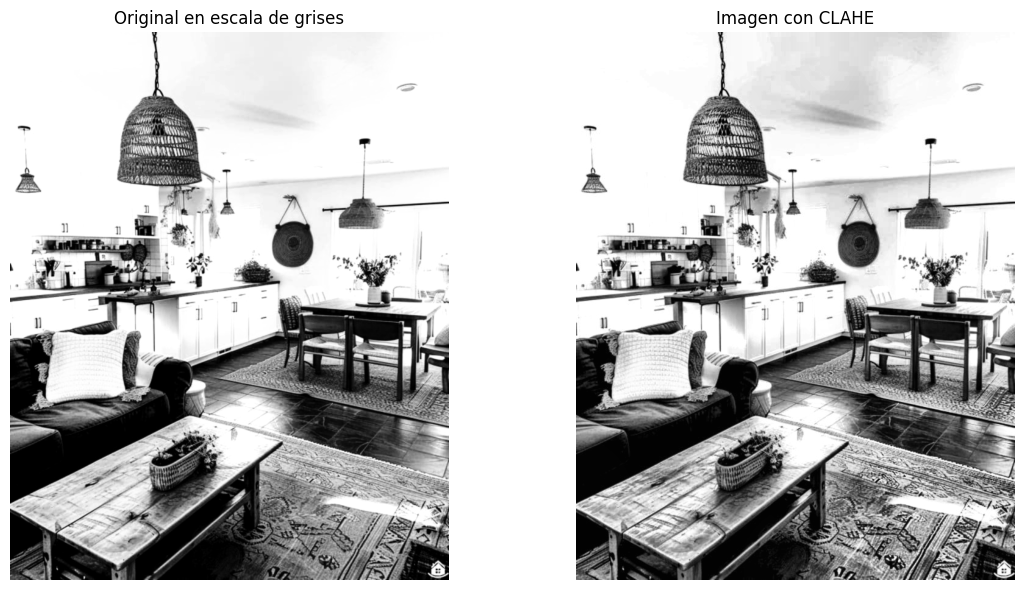

In [47]:
import cv2
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
img_gray = cv2.imread("salaunoaltocontraste.jpg", cv2.IMREAD_GRAYSCALE)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE
img_clahe = clahe.apply(img_gray)

# Mostrar ambas imágenes
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("Original en escala de grises")
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Imagen con CLAHE")
plt.imshow(img_clahe, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Histograma de la imagen con CLAHE:

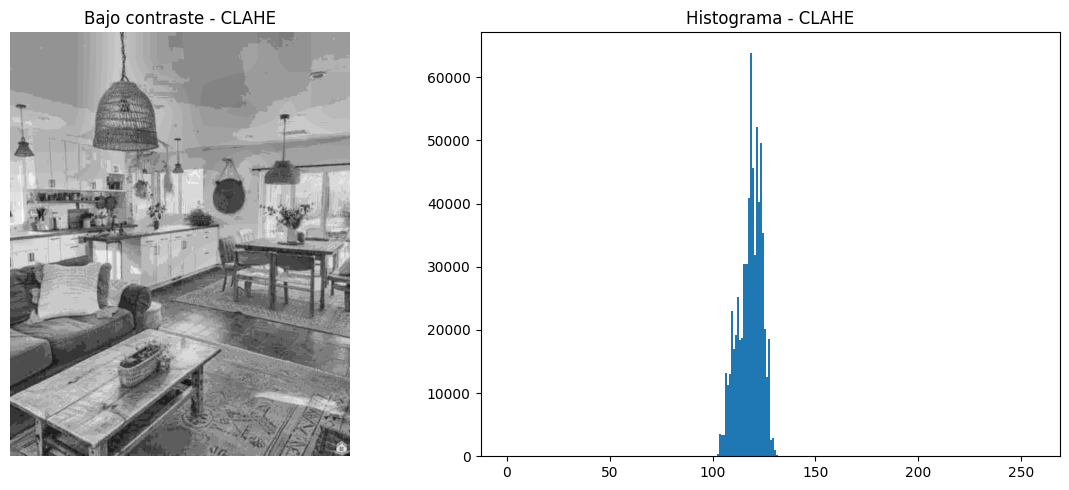

In [48]:
# Cargar imagen en escala de grises
img_baja = cv2.imread('salaunobajocontraste.jpg', cv2.IMREAD_GRAYSCALE)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE
img_baja_clahe = clahe.apply(img_baja)

# Mostrar imagen original y CLAHE
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Bajo contraste - CLAHE')
plt.imshow(img_baja_clahe, cmap='gray')
plt.axis('off')

# Mostrar histograma
plt.subplot(1, 2, 2)
plt.title('Histograma - CLAHE')
plt.hist(img_baja_clahe.ravel(), 256, [0,256])
plt.tight_layout()
plt.show()


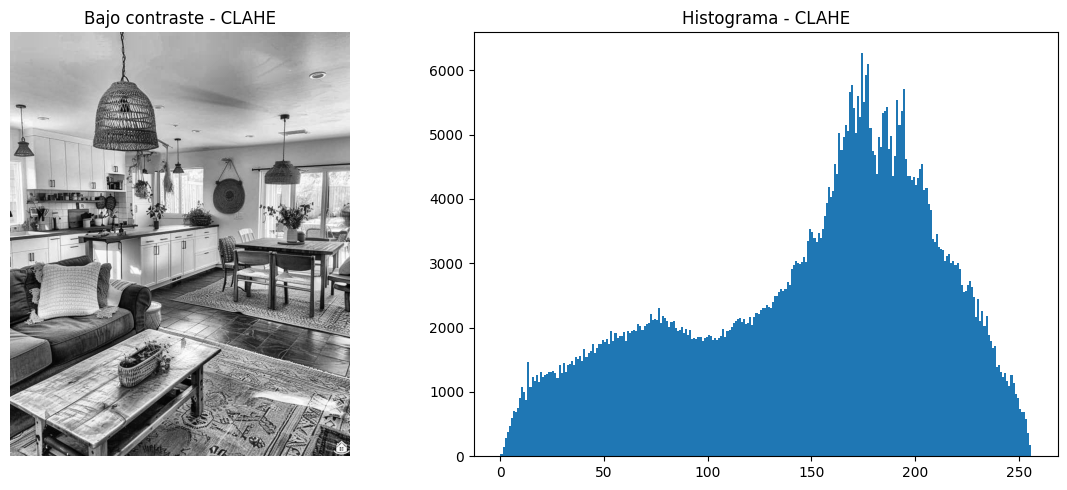

In [49]:
# Cargar imagen en escala de grises
img_baja = cv2.imread('salauno.jpg', cv2.IMREAD_GRAYSCALE)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE
img_baja_clahe = clahe.apply(img_baja)

# Mostrar imagen original y CLAHE
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Bajo contraste - CLAHE')
plt.imshow(img_baja_clahe, cmap='gray')
plt.axis('off')

# Mostrar histograma
plt.subplot(1, 2, 2)
plt.title('Histograma - CLAHE')
plt.hist(img_baja_clahe.ravel(), 256, [0,256])
plt.tight_layout()
plt.show()


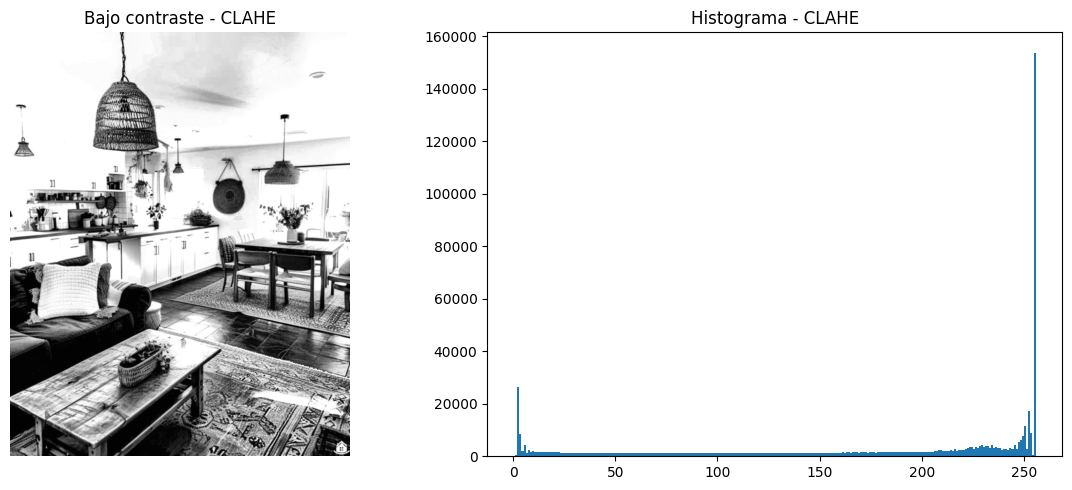

In [50]:
# Cargar imagen en escala de grises
img_baja = cv2.imread('salaunoaltocontraste.jpg', cv2.IMREAD_GRAYSCALE)

# Crear objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Aplicar CLAHE
img_baja_clahe = clahe.apply(img_baja)

# Mostrar imagen original y CLAHE
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Bajo contraste - CLAHE')
plt.imshow(img_baja_clahe, cmap='gray')
plt.axis('off')

# Mostrar histograma
plt.subplot(1, 2, 2)
plt.title('Histograma - CLAHE')
plt.hist(img_baja_clahe.ravel(), 256, [0,256])
plt.tight_layout()
plt.show()


## Ejercicio 5 - Análisis de resultados ##

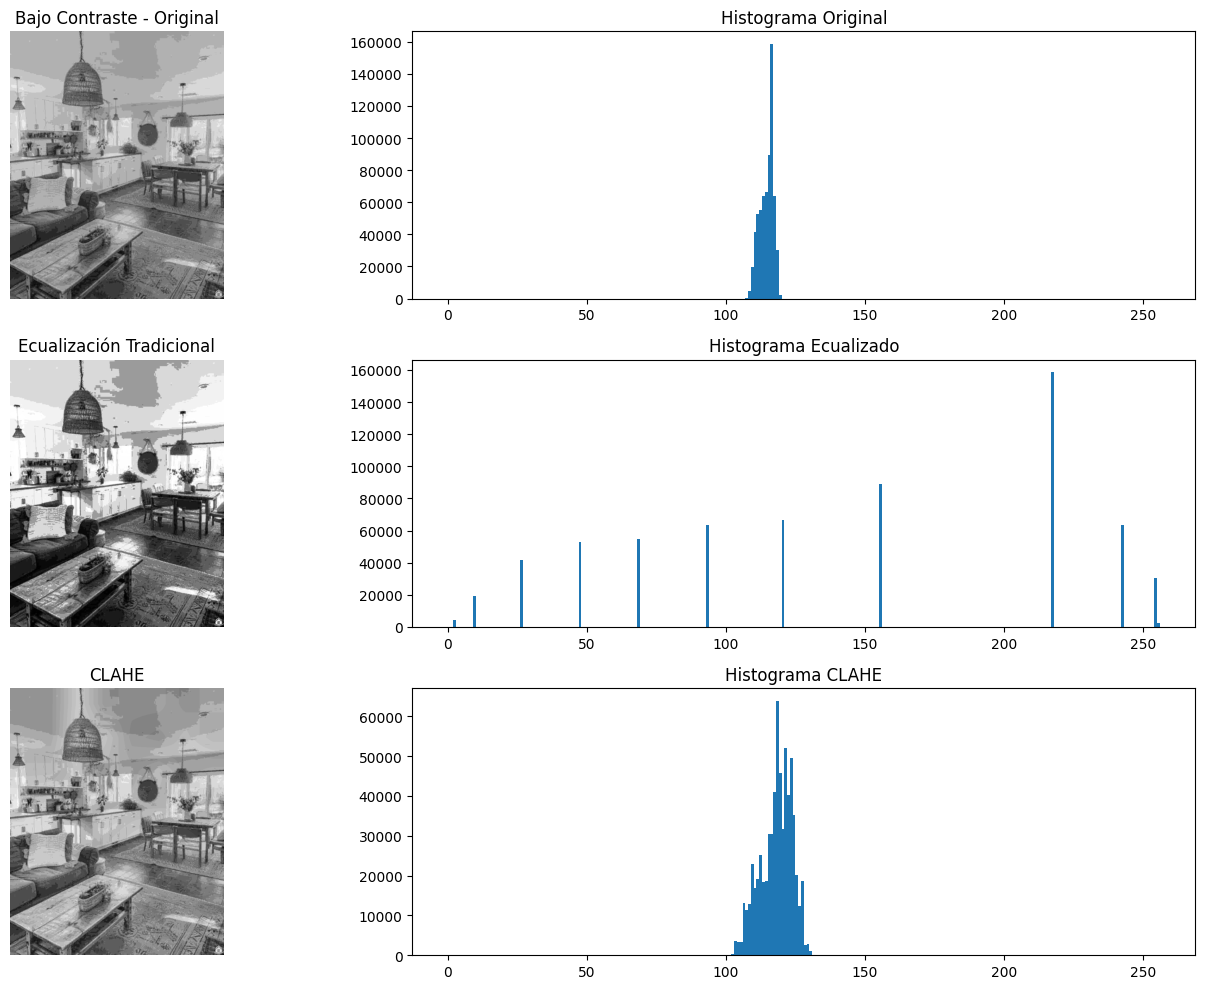

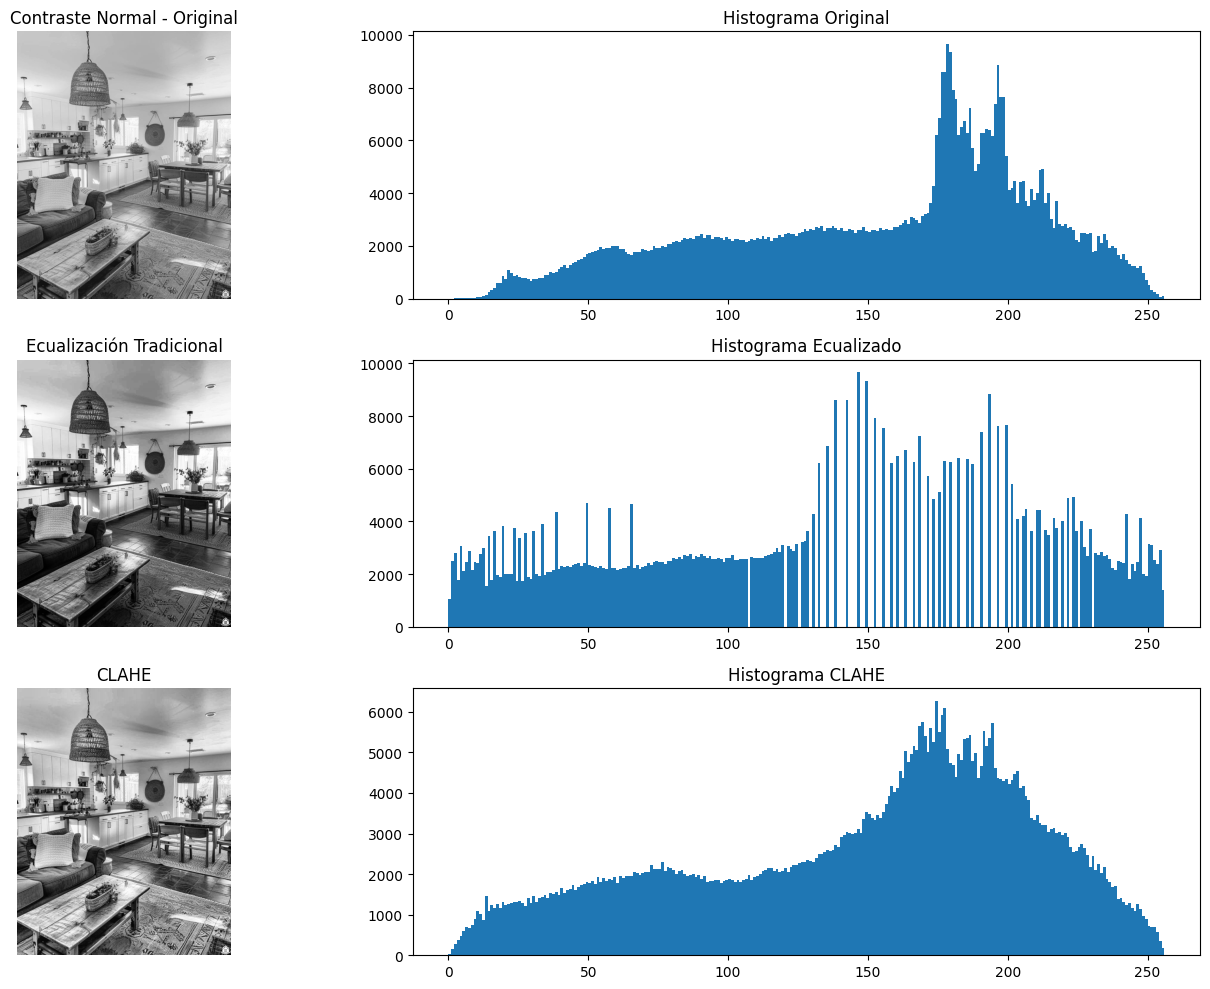

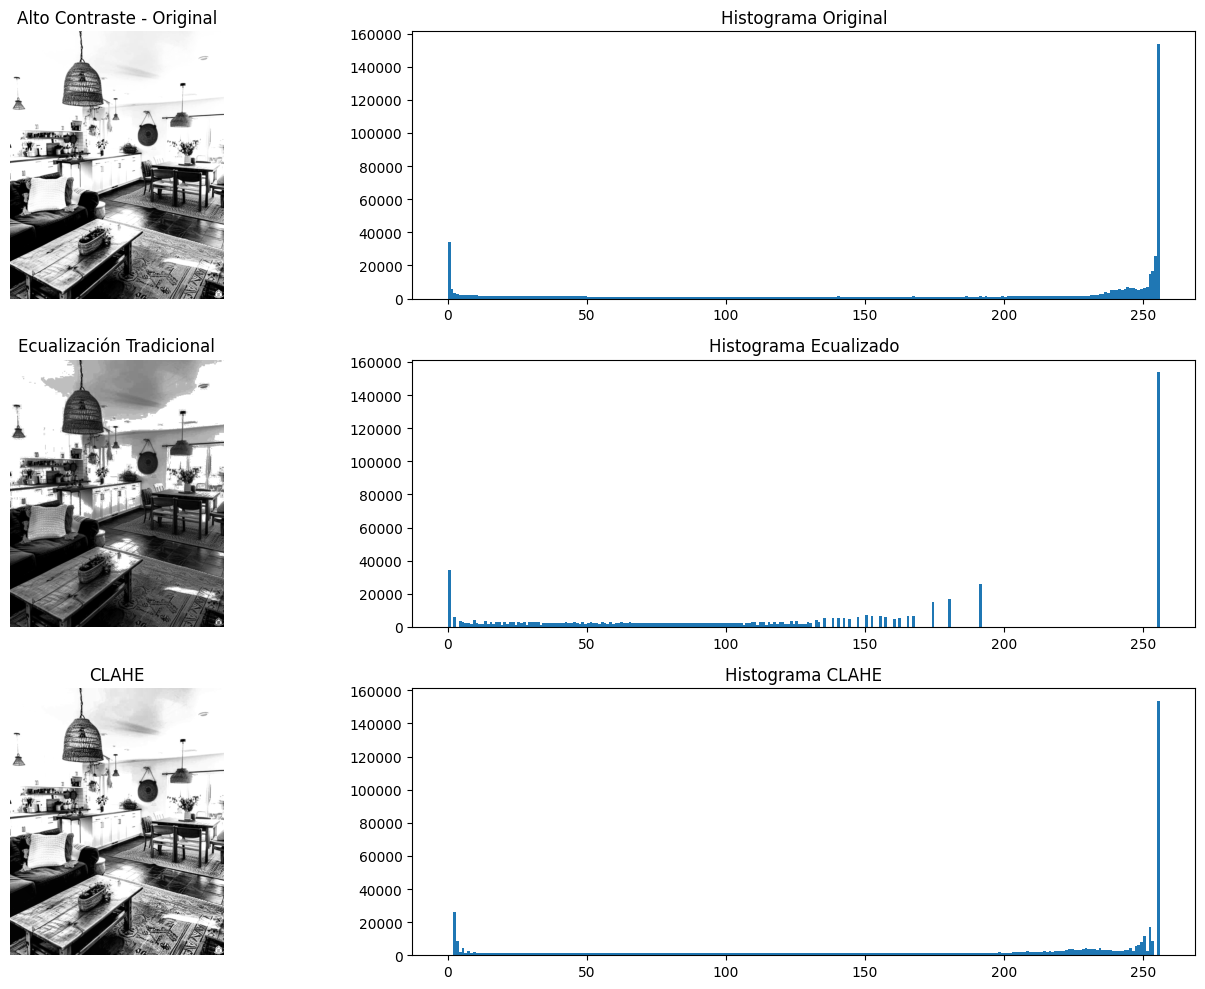

In [51]:
import cv2
import matplotlib.pyplot as plt

# Función para análisis comparativo
def comparar_ecualizaciones(nombre_archivo, titulo):
    # Leer imagen en escala de grises
    img_gray = cv2.imread(nombre_archivo, cv2.IMREAD_GRAYSCALE)
    
    # Ecualización tradicional
    img_eq = cv2.equalizeHist(img_gray)
    
    # Ecualización con CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    img_clahe = clahe.apply(img_gray)
    
    # Mostrar imágenes y sus histogramas
    plt.figure(figsize=(15, 10))
    
    # Imagen original y su histograma
    plt.subplot(3, 2, 1)
    plt.imshow(img_gray, cmap='gray')
    plt.title(f'{titulo} - Original')
    plt.axis('off')
    
    plt.subplot(3, 2, 2)
    plt.hist(img_gray.ravel(), 256, [0, 256])
    plt.title('Histograma Original')

    # Imagen con ecualización tradicional
    plt.subplot(3, 2, 3)
    plt.imshow(img_eq, cmap='gray')
    plt.title('Ecualización Tradicional')
    plt.axis('off')
    
    plt.subplot(3, 2, 4)
    plt.hist(img_eq.ravel(), 256, [0, 256])
    plt.title('Histograma Ecualizado')

    # Imagen con CLAHE
    plt.subplot(3, 2, 5)
    plt.imshow(img_clahe, cmap='gray')
    plt.title('CLAHE')
    plt.axis('off')
    
    plt.subplot(3, 2, 6)
    plt.hist(img_clahe.ravel(), 256, [0, 256])
    plt.title('Histograma CLAHE')

    plt.tight_layout()
    plt.show()

# Aplicamos la función a cada imagen
comparar_ecualizaciones('salaunobajocontraste.jpg', 'Bajo Contraste')
comparar_ecualizaciones('salauno.jpg', 'Contraste Normal')
comparar_ecualizaciones('salaunoaltocontraste.jpg', 'Alto Contraste')


## Guardado de imagenes generadas

In [ ]:
import cv2
import os

# Cargar imágenes originales
salaunobajocontraste = cv2.imread('salaunobajocontraste.jpg')
salauno = cv2.imread('salauno.jpg')
salaunoaltocontraste = cv2.imread('salaunoaltocontraste.jpg')

# Verificar que las imágenes se cargaron correctamente
if salaunobajocontraste is None:
    print("Error al cargar salaunobajocontraste.jpg")
if salauno is None:
    print("Error al cargar salauno.jpg")
if salaunoaltocontraste is None:
    print("Error al cargar salaunoaltocontaste.jpg")


In [53]:
import cv2
import os
import matplotlib.pyplot as plt

# Crear carpeta 'resultados' si no existe
if not os.path.exists("resultados"):
    os.makedirs("resultados")

# Lista de imágenes y sus nombres
imagenes = {
    "salaunobajocontraste": salaunobajocontraste,
    "salauno": salauno,
    "salaunoaltocontraste": salaunoaltocontraste
}

# Objeto CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

for nombre, imagen_color in imagenes.items():
    # Convertir a escala de grises
    imagen_gray = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)

    # Ecualización tradicional
    imagen_eq = cv2.equalizeHist(imagen_gray)

    # Ecualización con CLAHE
    imagen_clahe = clahe.apply(imagen_gray)

    # Guardar imágenes
    cv2.imwrite(f"resultados/{nombre}_original_color.jpg", imagen_color)
    cv2.imwrite(f"resultados/{nombre}_gris.jpg", imagen_gray)
    cv2.imwrite(f"resultados/{nombre}_eq.jpg", imagen_eq)
    cv2.imwrite(f"resultados/{nombre}_clahe.jpg", imagen_clahe)

print("Todas las imágenes fueron procesadas y guardadas en la carpeta 'resultados'.")


Todas las imágenes fueron procesadas y guardadas en la carpeta 'resultados'.
